### Importing packages ###

In [1502]:
import numpy as np
import math
import pandas as pd
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

<h1><center><font size=8>PART A</center></font></h1>


## Please answer the following questions with all relevant assumptions, explanations and details. 

In [1503]:
#1 1.A. Refer above table and find the joint probability of the people who planned to purchase and actually placed an order.
# From 400 people planned to purchase and actually placed an order  is 400 out of 2000 people.

planned_purchase = 400
total_count = 2000

print("The joint probability found for the people who planned to purchase and actually placed an order: {}".format(planned_purchase/total_count))

#1.B. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase

# Actually placed an order = 400
# Planned to purchase = 500

print("The joint probability  of the people who planned to purchase and actually placed an order, given that people planned to purchase is: {}".format(400/500))

The joint probability found for the people who planned to purchase and actually placed an order: 0.2
The joint probability  of the people who planned to purchase and actually placed an order, given that people planned to purchase is: 0.8


*------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

2. An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following questions.

Ans, Here we are using the binomial distribution as the outcomes are labeled as success or failure,

In [1504]:
p   =  0.05 # failure rate of products that the company manufactures is 5%
n   =  10 # sample size given


#2.A. Probability that none of the items are defective? 
k   =  0 # since none of the items are defective

print("The probability of none of the items are defective is: {}".format(round(binom.pmf(k,n,p),4)))

#2.B. Probability that exactly one of the items is defective? 
k=1

print("The probability that exactly one of the item is defective: {}".format(round(binom.pmf(k,n,p),4)))

#2.C. Probability that two or fewer of the items are defective? 
# here 0<k<=2 , so we are cummulative binomial distribution
k=2

print("The probability that two or fewer of the items are defective: {}".format(round(binom.cdf(k,n,p),4)))


#2.D. Probability that three or more of the items are defective?
# here 3<=k<10 , hence it is the compliment of 2.C

p = round(1-binom.cdf(k,n,p),4) # Let p be the required probability

print("The probability that three or more of the items are defective: {}".format(p))

The probability of none of the items are defective is: 0.5987
The probability that exactly one of the item is defective: 0.3151
The probability that two or fewer of the items are defective: 0.9885
The probability that three or more of the items are defective: 0.0115


*------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

Q3. A car salesman sells on an average 3 cars per week.

The probability that in a given week he will sell some cars: 0.9502
The probability of selling 2 or more but less than 5 cars in a given week: 0.6161


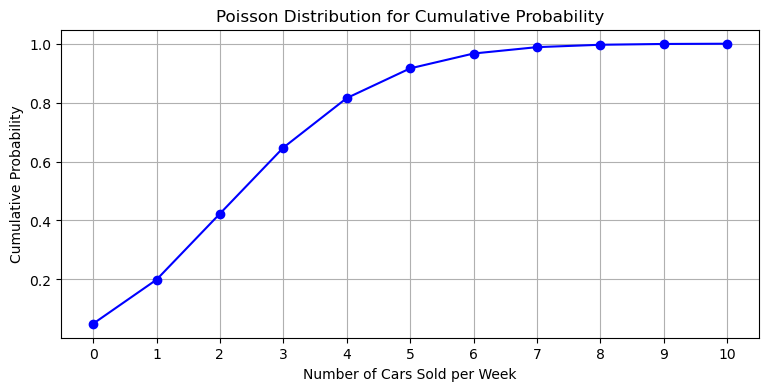

In [1505]:
#3.A. What is Probability that in a given week he will sell some cars?

lambda_rate =  3 # the mean given
probability_some_cars = round(1 - poisson.pmf(0, lambda_rate),4)
print("The probability that in a given week he will sell some cars: {}".format(probability_some_cars))

#3.B. What is Probability that in a given week he will sell 2 or more but less than 5 cars? [

probability_2_to_4_cars = round(sum(poisson.pmf(k, lambda_rate) for k in range(2, 5)),4)
print("The probability of selling 2 or more but less than 5 cars in a given week: {}".format(probability_2_to_4_cars))

#3.C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week.?

x = np.arange(0, 11)
poisson_probs = poisson.pmf(x, lambda_rate)
cumulative_probs = np.cumsum(poisson_probs)

plt.figure(figsize=(9, 4))
plt.plot(x, cumulative_probs, 'o-', color='b')
plt.title('Poisson Distribution for Cumulative Probability')
plt.xlabel('Number of Cars Sold per Week')
plt.ylabel('Cumulative Probability')
plt.xticks(x)
plt.grid(True)
plt.show()

*------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

4.Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed,
marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the
percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours
independently place orders with the same bot. Answer the following questions.

In [1506]:
p = 0.868 # since there are three orders and the probability of a correct order is 0.868.

# Probability of failure (order not recognized correctly)
q = 1 - p

# Probability that all three orders will be recognized correctly
probability_all_correct = round(p ** 3,4)

# Probability that none of the three orders will be recognized correctly
probability_none_correct = round(q ** 3,4)

# Probability that at least two of the three orders will be recognized correctly
probability_at_least_two_correct = round(3 * p**2 * q + p**3,4)

#4.A. What is the probability that all three orders will be recognised correctly? 

print("The probability that all three orders will be recognized correctly: {}".format(probability_all_correct))

#4.B. What is the probability that none of the three orders will be recognised correctly? 
print("The probability that none of the three orders will be recognized correctly: {}".format(probability_none_correct))

#4.C. What is the probability that at least two of the three orders will be recognised correctly? [
print("The probability that at least two of the three orders will be recognized correctly: {}".format(probability_at_least_two_correct))

The probability that all three orders will be recognized correctly: 0.654
The probability that none of the three orders will be recognized correctly: 0.0023
The probability that at least two of the three orders will be recognized correctly: 0.9523


*------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

5. Explain 1 real life industry scenario (other than the ones mentioned above) where you can use the concepts learnt in this module of
Applied Statistics to get data driven business solution.

Ans) The textile industry uses the applied statistics theory to deterrmine the discount rates , offers etc. They uses probability theory for strategising their sales plan. This will help them to know which designs , offers will prevail in the market. For example, During festive season , more demand will be for traditional dress. This will help the textile industry to provide discounts , put up vivid designs to attract people during the peak time.





*------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

<h1><center><font size=8>PART B</center></font></h1>


### 1.Read the data set, clean the data and prepare final dataset to be used for analysis.

In [1507]:
#reading the dataset
basketball_df=pd.read_csv("Basketball.csv")

In [1508]:
#displaying the ist 5 rows of the dataset
basketball_df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [1509]:
#displaying the last 5 rows of the dataset
basketball_df.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [1510]:
print("Number of rows: {}, Number of columns: {}".format(basketball_df.shape[0], basketball_df.shape[1]))

Number of rows: 61, Number of columns: 13


In [1511]:
#checking the data types of the columns
basketball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


- *All the columns have 61 entries*
- *The `Tournament` and `HighestPositionHeld` columns are numerical data while the rest of the columns are categorical in nature*


In [1512]:
# checking missing values across each columns
basketball_df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

- *None of the columns are having missing values* 

## **Data cleaning**

Before starting with the EDA , we need to clean the dataset.In our dataset we can see except the column called Team rest others are having quantitave data. So, we will convert them to numerical datatype. Similarly , we will resolve the ambiguities one by one till we get the cleaned dataset for EDA 

In [1513]:
# convert the team launch to starting year 

basketball_df['TeamLaunch'] = basketball_df['TeamLaunch'].str[:4]

basketball_df['TeamLaunch']

0     1929
1     1929
2     1929
3     1931
4     1929
      ... 
56    2009
57    1956
58    1951
59    1955
60    2017
Name: TeamLaunch, Length: 61, dtype: object

In [1514]:
# replace all the '-' with 0s
basketball_df.replace(to_replace='-', value=0, inplace=True)

In [1515]:
# convert all the columns except team name to numerical datatype

columns_to_convert = basketball_df.columns.difference(['Team']) 
basketball_df[columns_to_convert] = basketball_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

basketball_df

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009,20
57,Team 58,1,22,30,7,8,15,37,57,0,0,1956,16
58,Team 59,1,19,30,7,5,18,51,85,0,0,1951,16
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955,15


In [1516]:
basketball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     int64 
 3   PlayedGames          61 non-null     int64 
 4   WonGames             61 non-null     int64 
 5   DrawnGames           61 non-null     int64 
 6   LostGames            61 non-null     int64 
 7   BasketScored         61 non-null     int64 
 8   BasketGiven          61 non-null     int64 
 9   TournamentChampion   61 non-null     int64 
 10  Runner-up            61 non-null     int64 
 11  TeamLaunch           61 non-null     int64 
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 6.3+ KB


In [1517]:
# Describe the dataset with various summary and statistics
basketball_df.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,24.000000,901.426230,796.819672,303.967213,188.934426,303.754098,1140.344262,1140.229508,1.426230,1.409836,1958.918033,7.081967
std,26.827225,1134.899121,876.282765,406.991030,201.799477,294.708594,1506.740211,1163.710766,5.472535,4.540107,27.484114,5.276663
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1929.000000,1.000000
25%,4.000000,96.000000,114.000000,34.000000,24.000000,62.000000,153.000000,221.000000,0.000000,0.000000,1935.000000,3.000000
50%,12.000000,375.000000,423.000000,123.000000,95.000000,197.000000,430.000000,632.000000,0.000000,0.000000,1951.000000,6.000000
75%,38.000000,1351.000000,1318.000000,426.000000,330.000000,563.000000,1642.000000,1951.000000,0.000000,0.000000,1978.000000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.000000,25.000000,2017.000000,20.000000


- *9 attributes have  minimum value of '0' in the Central Tendency chart, hence the distributions contains one or more zero values.*


## **EDA**

*Before starting with EDA , we will create some additional features which is required for our analysis.*

- *`WinPercentage:` Percentages of games won by the team.*
- *`BasketRatio:` Ratio of baskets scored to that of given.*


In [1518]:
# Adding WinPercentage column
win_pct = basketball_df['WonGames'] / basketball_df['PlayedGames']
basketball_df.insert(loc=5, column='WinPercentage', value=round(win_pct*100,2))
basketball_df.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinPercentage,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,59.63,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,57.24,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,47.48,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,44.56,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,43.77,633,920,4631,3700,8,7,1929,1


In [1519]:
# Adding BasketRatio column
basket_ratio = basketball_df['BasketScored'] / basketball_df['BasketGiven']
basketball_df.insert(loc=11, column='BasketRatio', value=round(basket_ratio*10,2))
basketball_df.head()

,Team,Tournament,Score,PlayedGames,WonGames,WinPercentage,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,BasketRatio,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,59.63,552,563,5947,3140,33,18.94,23,1929,1
1,Team 2,86,4262,2762,1581,57.24,573,608,5900,3114,25,18.95,25,1929,1
2,Team 3,80,3442,2614,1241,47.48,598,775,4534,3309,10,13.70,8,1929,1
3,Team 4,82,3386,2664,1187,44.56,616,861,4398,3469,6,12.68,6,1931,1
4,Team 5,86,3368,2762,1209,43.77,633,920,4631,3700,8,12.52,7,1929,1


### **Univariate Analysis**

In [1520]:
# descriptive statistics
basketball_df.describe()

,Tournament,Score,PlayedGames,WonGames,WinPercentage,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,BasketRatio,Runner-up,TeamLaunch,HighestPositionHeld
count,61.000000,61.000000,61.000000,61.000000,60.000000,61.000000,61.000000,61.000000,61.000000,61.000000,60.000000,61.000000,61.000000,61.000000
mean,24.000000,901.426230,796.819672,303.967213,31.364667,188.934426,303.754098,1140.344262,1140.229508,1.426230,8.048500,1.409836,1958.918033,7.081967
std,26.827225,1134.899121,876.282765,406.991030,7.831421,201.799477,294.708594,1506.740211,1163.710766,5.472535,2.730654,4.540107,27.484114,5.276663
min,1.000000,0.000000,0.000000,0.000000,16.670000,0.000000,0.000000,0.000000,0.000000,0.000000,3.850000,0.000000,1929.000000,1.000000
25%,4.000000,96.000000,114.000000,34.000000,27.610000,24.000000,62.000000,153.000000,221.000000,0.000000,6.595000,0.000000,1935.000000,3.000000
50%,12.000000,375.000000,423.000000,123.000000,30.490000,95.000000,197.000000,430.000000,632.000000,0.000000,7.360000,0.000000,1951.000000,6.000000
75%,38.000000,1351.000000,1318.000000,426.000000,33.542500,330.000000,563.000000,1642.000000,1951.000000,0.000000,8.345000,0.000000,1978.000000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,59.630000,633.000000,1070.000000,5947.000000,3889.000000,33.000000,18.950000,25.000000,2017.000000,20.000000


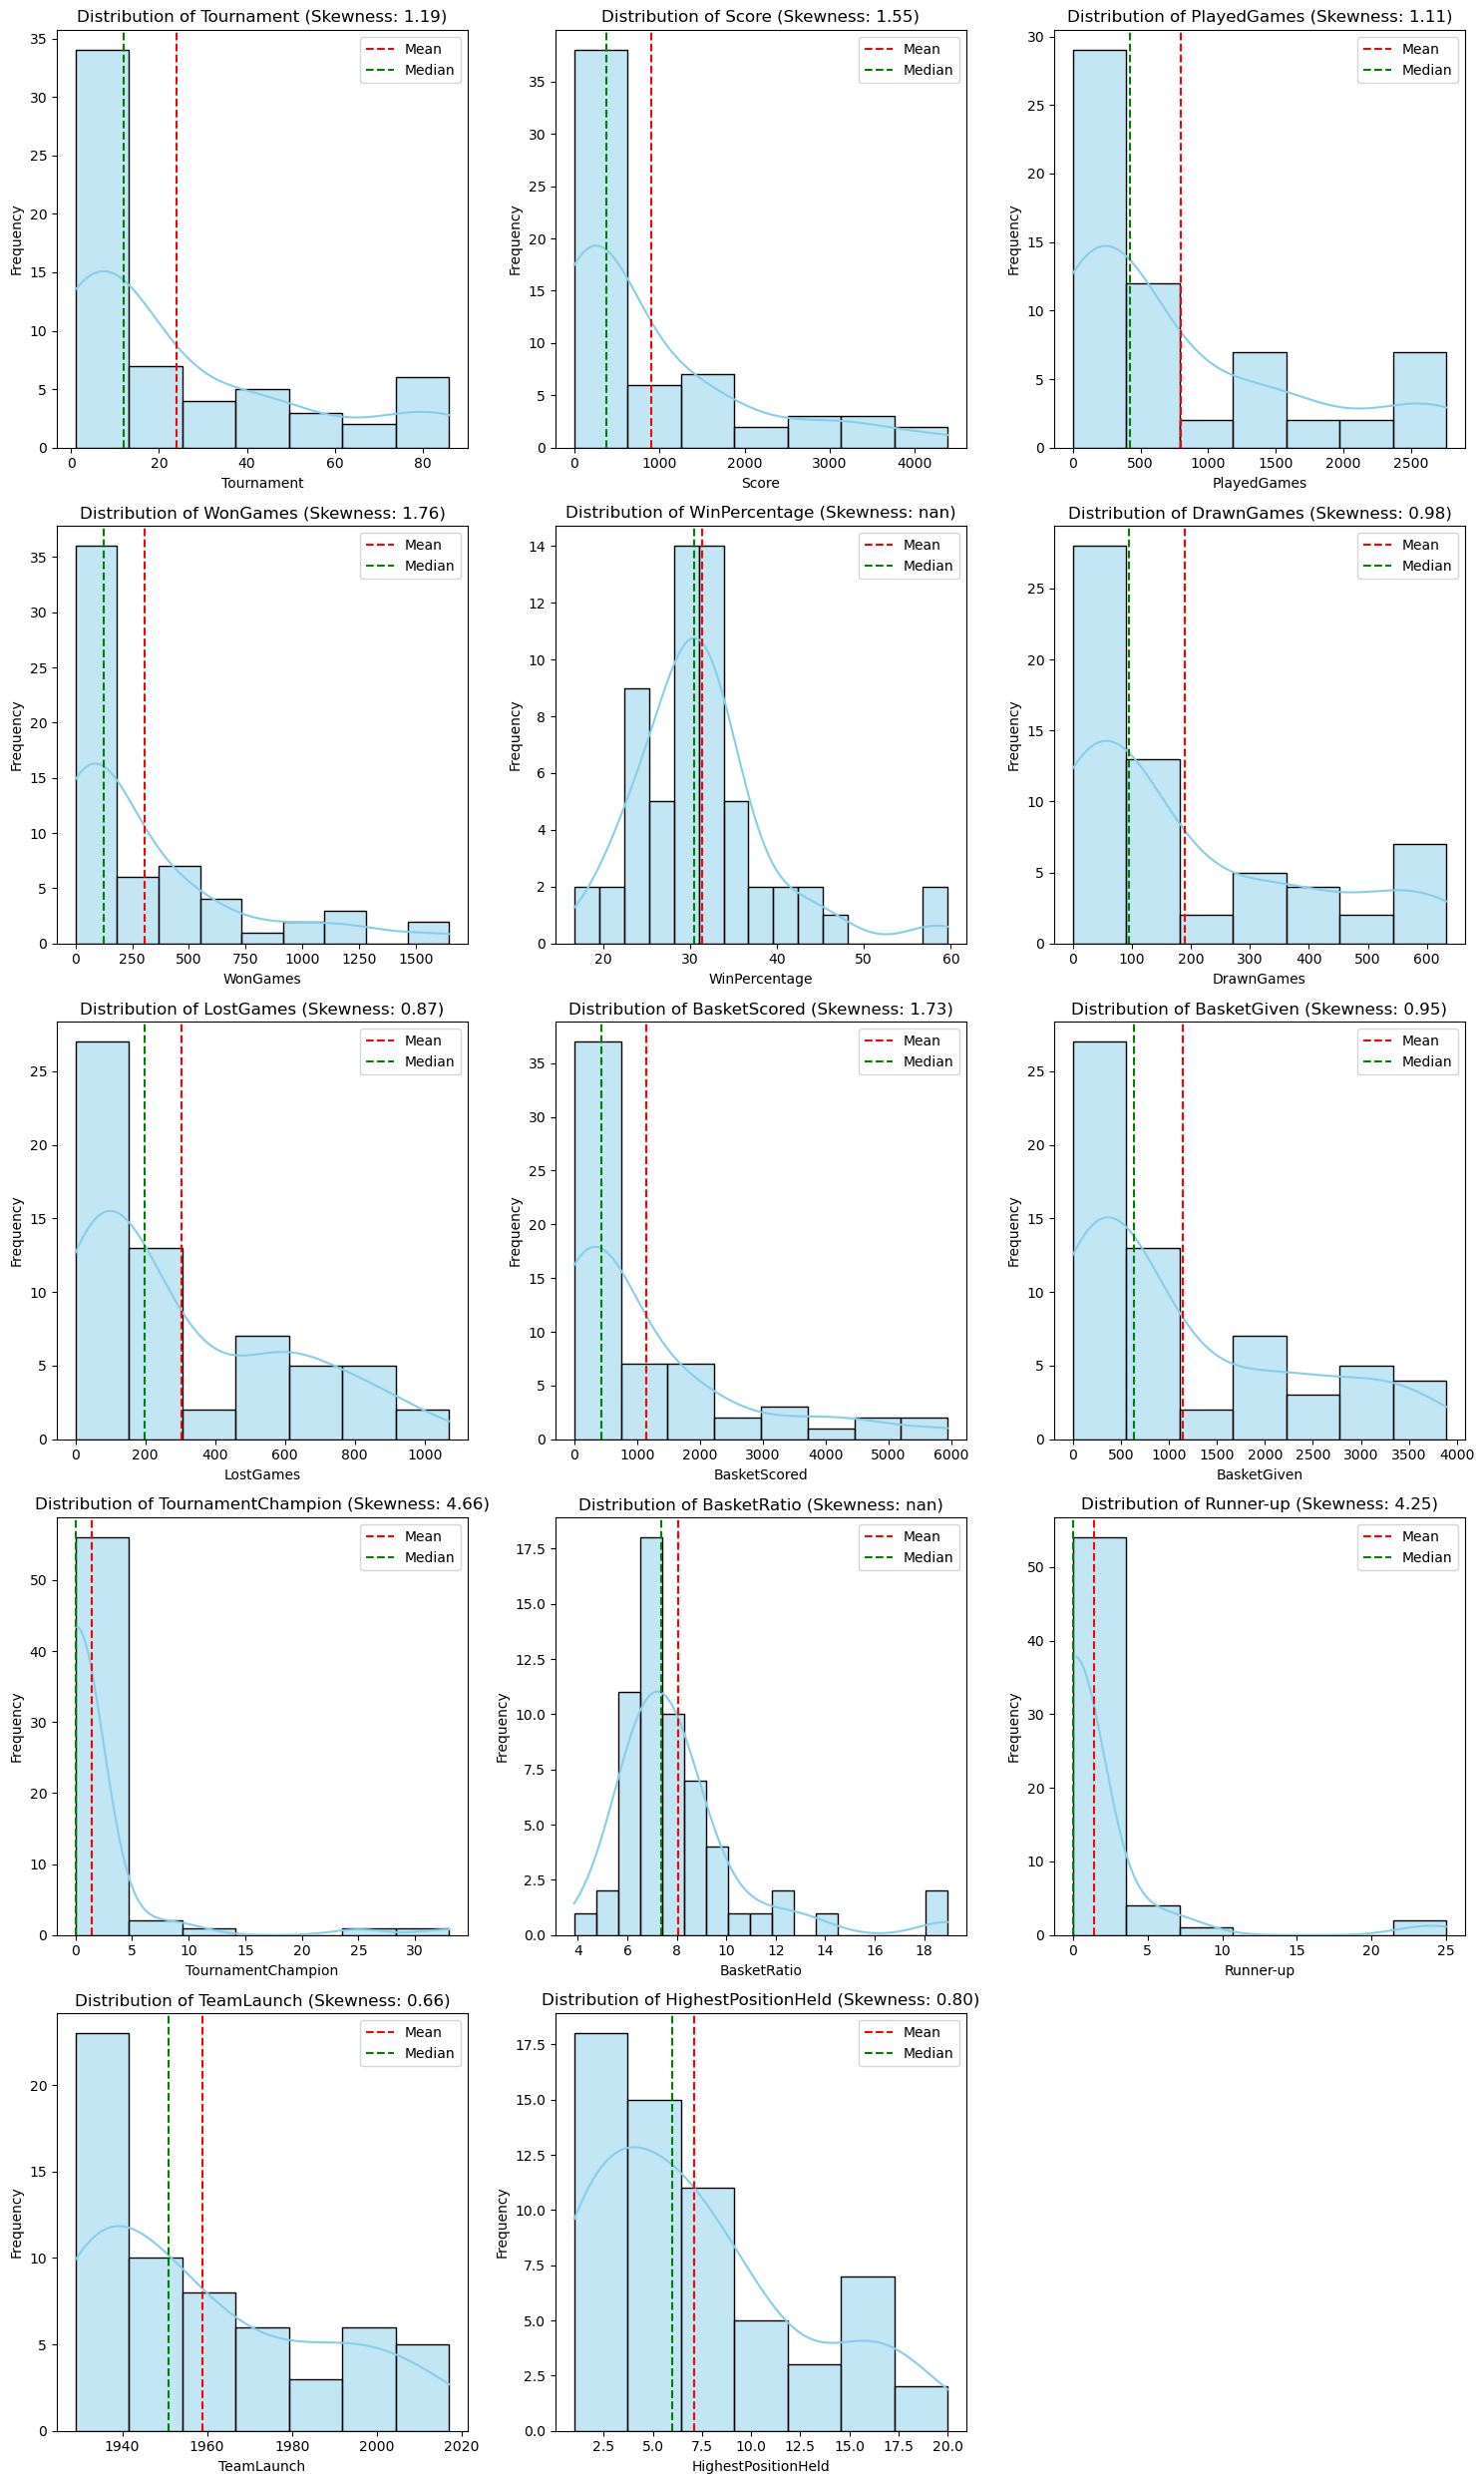

In [1521]:

numerical_columns = basketball_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_columns)
num_rows = math.ceil(num_cols / 3)
plt.figure(figsize=(15, 5*num_rows))

for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(basketball_df[col], kde=True, color='skyblue')
    plt.axvline(basketball_df[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(basketball_df[col].median(), color='green', linestyle='--', label='Median')
    plt.title(f'Distribution of {col} (Skewness: {skew(basketball_df[col]):.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

### **Bivariate Analysis**

Text(0.5, 1.0, 'Correlation Matrix of Numerical Data Types')

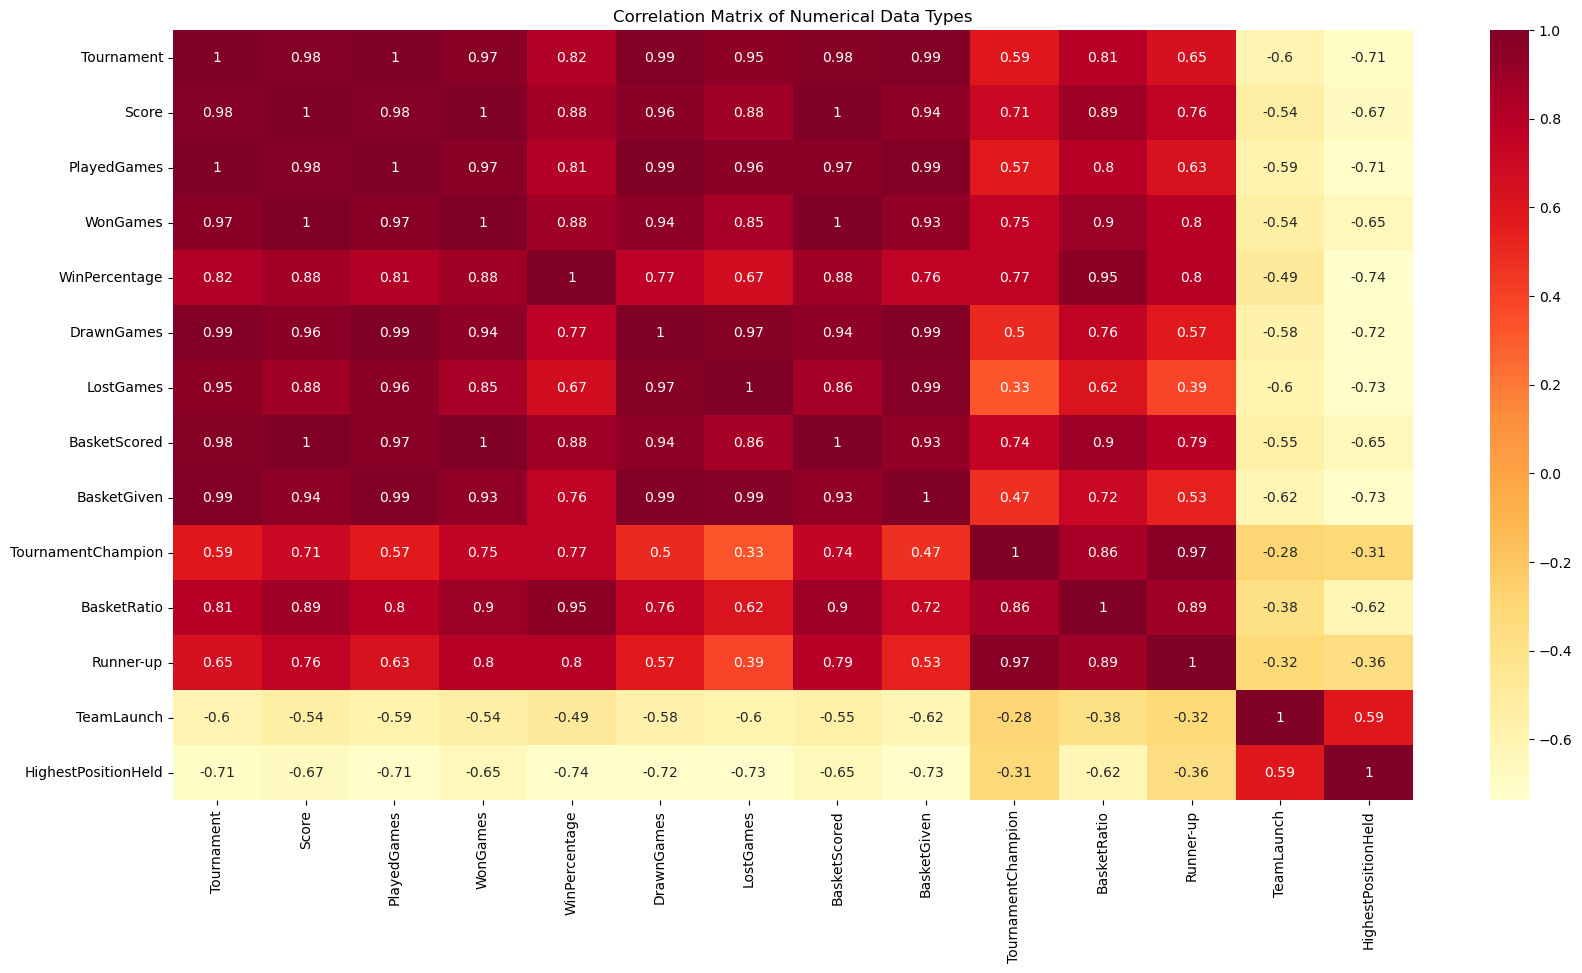

In [1522]:
numerical_columns = basketball_df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize = (20,10))
sns.heatmap(numerical_columns.corr(),annot=True , cmap ='YlOrRd' )
plt.title("Correlation Matrix of Numerical Data Types")

In [1523]:
# No of tournaments played by teams

fig = px.bar(basketball_df, x='Team', y='Tournament', title='Number of Tournaments per Team')
fig.update_xaxes(tickangle=30, tickfont=dict(size=8))
fig.update_layout(xaxis_title='Team', yaxis_title='Number of Tournaments', showlegend=False)
fig.update_layout(width=1200, height=600, autosize=True)
fig.show()

* Here we can see that Team 1, Team 2 , Team 5 has played most of the matches


In [1524]:
# function for plotting bar graphs
def plot_top_n_teams(df, column_name, n, title, y_label):
    
    df_sorted = df.sort_values(by=column_name, ascending=False)
    top_n_teams = df_sorted.head(n)
    fig = go.Figure()
    fig.add_trace(go.Bar(x=top_n_teams['Team'], y=top_n_teams[column_name], name=f'Top {n} Teams ({column_name})'))
    fig.update_layout(
    title=title,
    xaxis_title='Team',
    yaxis_title=y_label,
    barmode='group',
    width=700,
    height=500)
    
    fig.show()

In [1525]:
# Top 5 teams with most games won
plot_top_n_teams(basketball_df, 'WonGames', 5, 'Most wins by Top 5 teams', 'Games Won')

In [1526]:
# No of championships won by top 5 teams
plot_top_n_teams(basketball_df, 'TournamentChampion', 5, 'Most Championships by Top 5 teams', 'Championships Won')

In [1527]:
# Top 5 teams with most basket ratio
plot_top_n_teams(basketball_df, 'BasketRatio', 5, 'Basket ratio by Top 5 teams', 'Basket Ratio')

In [1528]:
# Top 5 teams with most Winning percentage
plot_top_n_teams(basketball_df, 'WinPercentage', 5, 'Winning percentage of Top 5 teams', 'Winning Percentage')


### **Multivariate Analysis**

In [1529]:
# Suggestions to improve



<h1><center><font size=8>PART C</center></font></h1>


In [1530]:
#loading the dataset
company_df = pd.read_csv("CompanyX_EU.csv")
company_df

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


### **Data Exploration**


In [1531]:
# Check the datatypes of each attribute

company_df.dtypes

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

In [1532]:
#Check for null values in the attributes

print("Total null values in the DataFrame:\n", company_df.isnull().sum())

Total null values in the DataFrame:
 Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64


### **Data preprocessing & visualisation**


In [1533]:
#Drop the null values

company_df=company_df.dropna()
print("Total null values in the DataFrame:\n", company_df.isnull().sum())

Total null values in the DataFrame:
 Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64


In [1534]:
# Convert the ‘Funding’ features to a numerical value.

company_df.loc[:,'Funds_in_million'] = company_df['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

company_df.dtypes

Startup              object
Product              object
Funding              object
Event                object
Result               object
OperatingState       object
Funds_in_million    float64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

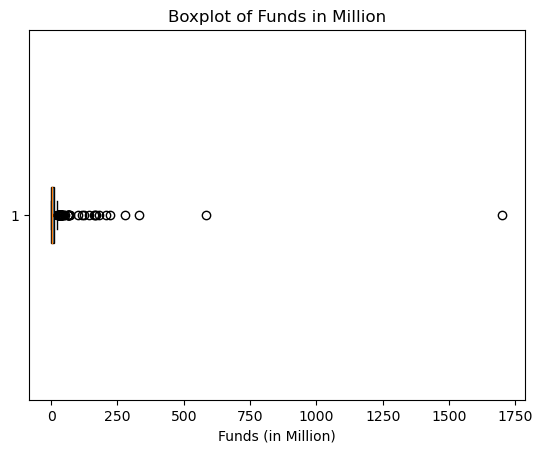

In [1535]:
# Plot box plot for funds in million.

plt.boxplot(company_df['Funds_in_million'].dropna(), vert=False, patch_artist=True)

plt.title('Boxplot of Funds in Million')
plt.xlabel('Funds (in Million)')
plt.ylabel('')

plt.show

In [1536]:
#Check the number of outliers greater than the upper fence.

Q1 = company_df['Funds_in_million'].quantile(0.25)
Q3 = company_df['Funds_in_million'].quantile(0.75)

IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR

# Count number of outliers in upper fence
outliers_upper_fence = (company_df['Funds_in_million'] > upper_fence).sum()

print("Upper Fence:", upper_fence)
print("Number of outliers in upper fence:", outliers_upper_fence)

Upper Fence: 22.569625
Number of outliers in upper fence: 60


In [1537]:
# Check frequency of the OperatingState features 

company_df['OperatingState'].value_counts()

OperatingState
Operating    319
Acquired      66
Closed        57
Ipo            4
Name: count, dtype: int64